# Yelp Academic Dataset Restaurant Analysis

## David Nguyen, Catherine Fei, Spencer Harper, Isaac Sikkema - November 24, 2020


### Approach
We plan to get the academic Yelp dataset that Yelp provides during an annual challenge they hold. This dataset holds many parts to it. The one we will be working on is the business.json file that holds the information of around 200,000 businesses. Some of the information that Yelp includes about these business are city, address, review count, categories, etc. We will separate these restaurants based on their categories(Asian, Mexican, etc.) and then can give the user a list of restaurants they'd like to see. Not only do we give a list of a specific genre, we are able to perform some analysis on them to see what Yelp included in this dataset.

### Reading in the dataset and make a dataframe with only restaurants

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Reading in the .json file
df_b = pd.read_json('yelp_academic_dataset_business.json', lines=True)

#Drop useless categories
drop_columns = ['hours','business_id', 'is_open', 'address', 'latitude', 'longitude'] #Dropping these categories cause we dont need it. Could be more.
df_b = df_b.drop(drop_columns, axis=1)

#This sets the output to show EVERYTHING. If you only want to see one row, set the first 'None' to 1. I just wanted to see the different column names.
pd.set_option("display.max_rows", None , "display.max_columns", None)

#A dataframe containing ONLY places that have the restaurant category.
restaurants = df_b[df_b['categories'].str.contains('Restaurants', case = False, na = False)]

Since this dataset contains businesses that are not solely restaurants, we want to remove them from this dataframe. We make a new dataframe if the category section includes the word 'Restaurant' in it. Now we should have an entire dataframe with restaurants. However, we now need to organize this data.  

### Let's look at some of the categories of these restaurants

In [33]:
df_explode = restaurants.assign(categories = restaurants.categories.str.split(', ')).explode('categories')
df_explode2 = df_explode.categories.value_counts()
print(df_explode2.head(50))

Restaurants               63944
Food                      16480
Nightlife                  9400
Bars                       9004
Fast Food                  8106
                          ...  
Greek                      1145
Juice Bars & Smoothies     1111
French                     1082
Wine Bars                  1077
Vegan                      1037
Name: categories, Length: 50, dtype: int64


Now that we have a list of what categories restaurants are in, we can filter them in their own dataframes to call later. We can manually do this based on what genre we are doing. For example, Asian restaurants would include categories like "Chinese", "Vietnamese", and "Japanese". We can manually make a dataframe with these with all different genres and would have a populated dataframe, though it is all done manually.

### Bleh - all the genres we decided to include

In [34]:
asian = restaurants[restaurants['categories'].str.contains('Chinese|Japanese|Sushi Bars|Asian Fusion|Indian|Thai|Vietnamese|Korean|Bubble Tea|Ramen|Dim Sum|Taiwanese|Hot Pot|Pan Asian|Szechuan|Malaysian|Indonesian|Poke', case=False, na=False)]
asian = asian.sort_values(by = 'review_count', ascending = False)

american = restaurants[restaurants['categories'].str.contains('American|Burgers|Breakfast|Chicken Wings|Barbeque|Steakhouses|Diners|Hot Dogs|Fast Food|Sandwiches|Cheesesteaks',case=False,na=False)]
american = american.sort_values(by = 'review_count', ascending = False)

italian = restaurants[restaurants['categories'].str.contains('Pizza|Italian',case=False,na=False)]
italian = italian.sort_values(by = 'review_count', ascending = False)

bars = restaurants[restaurants['categories'].str.contains('Nightlife|Bars|Sports Bars|Pubs|Beer|Wine Bars|Juice Bars|Beer Bar|Hookah Bars|Cocktail Bars',case=False,na=False)]
bars = bars.sort_values(by = 'review_count', ascending = False)

fast_food = restaurants[restaurants['categories'].str.contains('Fast Food',case=False,na=False)]
fast_food = fast_food.sort_values(by = 'review_count', ascending = False)

diners = restaurants[restaurants['categories'].str.contains('Diners',case=False,na=False)]
diners = diners.sort_values(by = 'review_count', ascending = False)

dessert = restaurants[restaurants['categories'].str.contains('Bakeries|Desserts|Ice Cream|Donuts|Creperies|Patisserie|Waffles',case=False,na=False)]
dessert = dessert.sort_values(by = 'review_count', ascending = False)

sandwiches = restaurants[restaurants['categories'].str.contains('Sandwiches|Delis|Bagels|Hot Dogs',case=False,na=False)]
sandwiches = sandwiches.sort_values(by = 'review_count', ascending = False)

coffee = restaurants[restaurants['categories'].str.contains('Coffee|',case=False,na=False)]
coffee = coffee.sort_values(by = 'review_count', ascending = False)

japanese = restaurants[restaurants['categories'].str.contains('Japanese|Sushi|Ramen',case=False,na=False)]
japanese = japanese.sort_values(by = 'review_count', ascending = False)

korean = restaurants[restaurants['categories'].str.contains('Korean',case=False,na=False)]
korean = korean.sort_values(by = 'review_count', ascending = False)

indian = restaurants[restaurants['categories'].str.contains('Indian',case=False,na=False)]
indian = indian.sort_values(by = 'review_count', ascending = False)

chinese = restaurants[restaurants['categories'].str.contains('Chinese|Dim Sum|Cantonese|Szechuan',case=False,na=False)]
chinese = chinese.sort_values(by = 'review_count', ascending = False)

mediterranean = restaurants[restaurants['categories'].str.contains('Mediterranean',case=False,na=False)]
mediterranean = mediterranean.sort_values(by = 'review_count', ascending = False)

vegetable_people = restaurants[restaurants['categories'].str.contains('Salad|Vegetarian',case=False,na=False)]
vegetable_people = vegetable_people.sort_values(by = 'review_count', ascending = False)

thai = restaurants[restaurants['categories'].str.contains('Thai',case=False,na=False)]
thai = thai.sort_values(by = 'review_count', ascending = False)

vietnamese = restaurants[restaurants['categories'].str.contains('Vietnamese',case=False,na=False)]
vietnamese = vietnamese.sort_values(by = 'review_count', ascending = False)

halal = restaurants[restaurants['categories'].str.contains('Halal',case=False,na=False)]
halal = halal.sort_values(by = 'review_count', ascending = False)

mexican = restaurants[restaurants['categories'].str.contains('Mexican|Tacos|Tex-Mex|Latin American',case=False,na=False)]
mexican = mexican.sort_values(by = 'review_count', ascending = False)
mexican = mexican[~mexican.categories.str.contains("Fast Food") ]

#### Now we can print whatever category we want to the user and they'll get all the restaurants sorted by review count.


In [35]:
print(asian.head())

                                name       city state postal_code  stars  \
202271                 Lotus of Siam  Las Vegas    NV       89104    4.0   
19269       Gangnam Asian BBQ Dining  Las Vegas    NV       89169    4.5   
116104                  Pho Kim Long  Las Vegas    NV       89102    3.5   
59575                   Bachi Burger  Las Vegas    NV       89123    4.0   
204860  Rio All-Suite Hotel & Casino  Las Vegas    NV       89103    2.5   

        review_count                                         attributes  \
202271          3986  {'RestaurantsReservations': 'True', 'BYOBCorka...   
19269           3512  {'BusinessAcceptsCreditCards': 'True', 'GoodFo...   
116104          3398  {'RestaurantsTakeOut': 'True', 'GoodForKids': ...   
59575           3356  {'Caters': 'False', 'OutdoorSeating': 'True', ...   
204860          2855  {'Ambience': '{'touristy': False, 'hipster': F...   

                                               categories  
202271  Automotive, Wine Bars, B

In the example above, the user specifies for all asian food. We are given a dataframe with all the asian restaurants in the Yelp dataset. We can see that 'Lotus of Siam' has the highest review counts of all the asian restaurants.

### Analysis - Restaurants by State/Province

In [51]:
state_group = restaurants.state.value_counts()
print(state_group.head(50))

ON     16221
AZ     12124
NV      8340
QC      6228
OH      5914
NC      4655
PA      4259
AB      3245
WI      1794
IL       702
SC       427
NY        12
TX         4
CA         3
CO         2
BC         2
VA         1
MB         1
HI         1
OR         1
WA         1
HPL        1
XWY        1
AR         1
NE         1
AL         1
VT         1
FL         1
Name: state, dtype: int64


Well, shit. I thought it was only restaurants in the U.S. but apparently Canada is included as well. That's Ontario with the most restaurants.

### Restaurants by State/Province

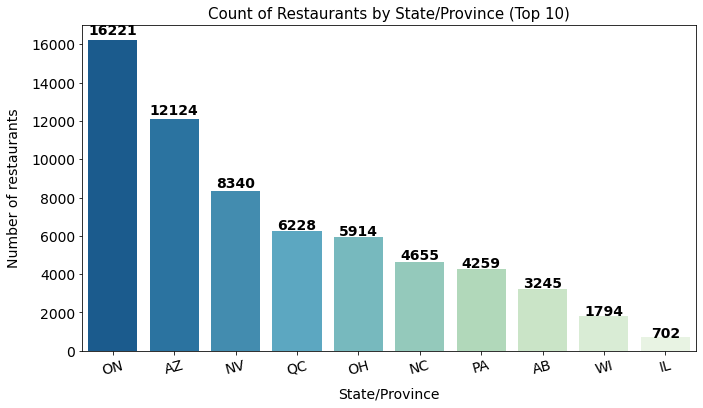

In [60]:
plt.figure(figsize=(11,6))
grouped = restaurants.state.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('State/Province', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by State/Province (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

Here we can see a visual representation of the distribution of restaurants in this dataset.

### Restaurants by City

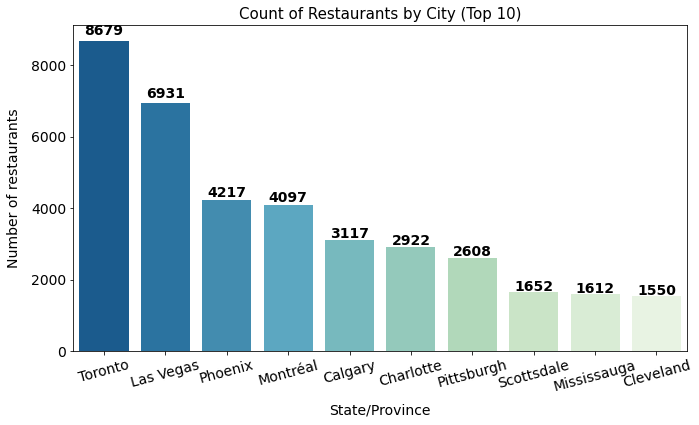

In [59]:
plt.figure(figsize=(11,6))
grouped = restaurants.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("GnBu_r", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('State/Province', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

Here we can see a visual representation of what city has the most restaurants. In this graph above, we see that Toronto has the most restaurants in this dataset which makes sense because Toronto is in Ontario.

### Restaurants With The Most Reviews

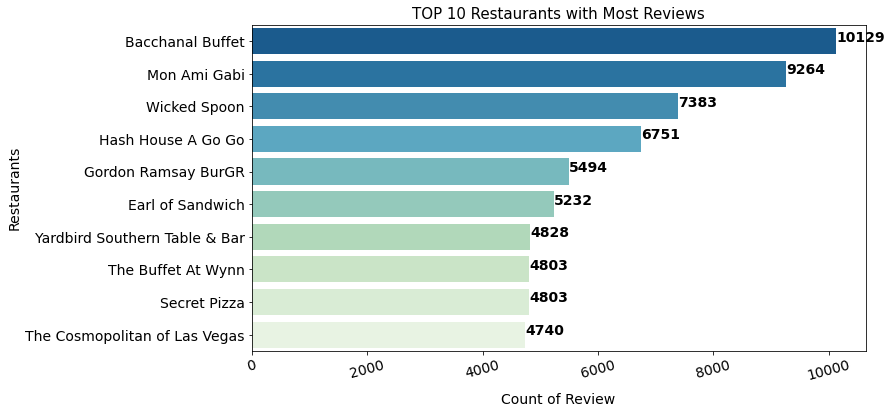

In [61]:
plt.figure(figsize=(11,6))
grouped = restaurants[['name','review_count']].sort_values(by='review_count', ascending=False)[:10]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("GnBu_r", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)

Here, we sort restaurants based on review count. We can see some very popular restaurants if you've never seen them before. Bacchanal Buffet and Gordon Ramsay BurGR restaurant are fantastic places to eat at.